### Very Basic Extraction of Possibly Relevant Quotes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
import math
import numpy as np
pd.options.mode.chained_assignment = None

In [3]:
politicians = pd.read_csv("data/politicians.csv")
names = politicians.speaker
politicians

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
690,Texas,Van Taylor
691,Texas,Veronica Escobar
692,Florida,W. Gregory Steube
693,South Carolina,William R. Timmons IV


We need population size per state, to normalize our data and get meaningful analysis:

In [4]:
population_size=pd.read_csv("data/annual_population.csv", sep=";")
population_size=population_size.set_index(['States'])

#remove dots present in front of some states names:
idx_list=[]
for idx,rows in population_size.iterrows():
    idx=idx.replace('.','')
    idx_list.append(idx)
population_size.index=idx_list

region=['United States', 'Northeast', 'Midwest', 'South', 'West']
index=population_size.index.to_list()
index=[x for x in index if x not in region]

#dataframe containing the annual (2015->2020) population size of each USA state
population_size_state=population_size.loc[index]

population_size_state.drop(['2015', '2016', '2017', '2018', '2019', '2020'], axis=1,inplace=True)
population_size_state=population_size_state.rename(columns={'Unnamed: 0':'States', "2015.1": "2015", "2016.1": "2016", "2017.1": "2017", "2018.1": "2018", "2019.1": "2019", "2020.1": "2020"})

population_size_state.sample(5)

,2015,2016,2017,2018,2019,2020
Colorado,5454328,5543844,5617421,5697155,5758486,5807719
Connecticut,3588561,3579830,3575324,3574561,3566022,3557006
Texas,27468531,27914064,28291024,28624564,28986794,29360759
New Mexico,2090071,2092555,2092844,2093754,2099634,2106319
Arizona,6832810,6944767,7048088,7164228,7291843,7421401


## 2015

We import the data containing quotations, based on QuoteBank:

In [5]:
# Merge quote data with speaker state data
dataframe15=pd.read_csv("data/df15.csv")
merged = pd.merge(dataframe15, politicians, on='speaker', how='inner').drop(columns=['state_y', 'Unnamed: 0'])

#drop useless columns:
merged=merged.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)
merged=merged.rename(columns={"state_x": "state"})

merged2015=pd.DataFrame(merged.groupby("state")['numOccurrences'].sum())

merged.sample(5)

#store the dataframe to use it in another file 
#merged.to_csv(path_or_buf="data/merged2015.csv", sep=';', index=True)

,quotation,speaker,date,numOccurrences,urls,state
515,"based on their skill and their ability, and no...",Marco Rubio,2015-04-15 07:00:03,1,['http://www.washingtonpost.com/blogs/fact-che...,Florida
158,And because of their partisan desire to mandat...,Ted Cruz,2015-04-03 19:15:04,1,['http://www.westernjournalism.com/ted-cruz-de...,Texas
786,It had nothing to do with political parties. I...,Steve Cohen,2015-11-30 19:08:00,2,['http://www.dailyclimate.org/t/-6613310982989...,Tennessee
565,And if we spend all of our time fighting over ...,Chris Coons,2015-09-24 05:00:19,2,['http://rollcall.com/news/former_divinity_stu...,Delaware
721,strongly believes that gay marriage is not con...,Tom Cotton,2015-04-02 00:13:00,36,['http://edition.cnn.com/2015/03/31/politics/a...,Arkansas


In [6]:
merged2015.sample(5)

,numOccurrences
state,
California,104
Texas,625
Colorado,78
Maine,13
New Mexico,1


In [7]:
print("size of the data:",merged.shape)

size of the data: (844, 6)


To get an insight into the kind of quotations we are working with:

In [8]:
merged.quotation.sample(10)

167    Unfortunately the modern Democratic Party has ...
275    What happens if you don't have the checks and ...
527    And so at the end of the day, if a majority of...
371    I think the Republicans have done a brilliant ...
727    In Iran, they'll hang you for the crime of bei...
332    Now today, some are trying to rewrite history ...
408    then have you demagogues like Trump come along...
139    On the Democratic side, the major donors that ...
672    I am proud to join my colleagues in introducin...
744    It's long past time we honor our commitment to...
Name: quotation, dtype: object

Visualisation of the number of quotations by states:

In [9]:
print(merged['state'].value_counts().to_markdown(headers=[]))

|:---------------------|----:|
| Texas                | 198 |
| Vermont              | 158 |
| Florida              |  91 |
| California           |  62 |
| Kentucky             |  51 |
| Illinois             |  31 |
| South Carolina       |  24 |
| New York             |  17 |
| Colorado             |  14 |
| Wisconsin            |  13 |
| Washington           |  12 |
| Iowa                 |  12 |
| Ohio                 |  11 |
| Arizona              |  11 |
| New Jersey           |  11 |
| Georgia              |  11 |
| Hawaii               |  10 |
| Kansas               |   9 |
| Maine                |   8 |
| Utah                 |   8 |
| Arkansas             |   8 |
| Virginia             |   7 |
| Louisiana            |   6 |
| Oregon               |   6 |
| Oklahoma             |   5 |
| Massachusetts        |   5 |
| Tennessee            |   5 |
| Alaska               |   5 |
| Nevada               |   4 |
| Maryland             |   4 |
| Minnesota            |   3 |
| Nebras

**Let's see what is the distribution of speakers per state on the matter of gay rights**

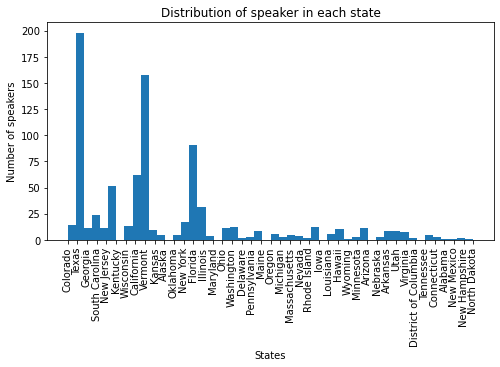

In [10]:
plt.figure(figsize=(8,4))
plt.hist(merged.state, bins= 50)
plt.xlabel('States')
plt.ylabel('Number of speakers')
plt.title('Distribution of speaker in each state')
plt.xticks(rotation = 90)
plt.show()

Something interesting is to compare/plot the distribution of **different** speakers per state. Indeed, some speakers may talk a lot about the topic, including a bias in the above distribution. In this case, if a state shows a high number of quotations, it won't necessarely mean that the topic is related a lot in the given state.

Comparison of the number of quotations between the speaker with the highest number of "gay rights" related quotations and the one with the smallest number: 

In [11]:
per_speaker=pd.DataFrame(merged.groupby("speaker")['numOccurrences'].sum())
max_per_speaker=per_speaker['numOccurrences'].idxmax()
max_nber=per_speaker['numOccurrences'].max()
min_per_speaker=per_speaker['numOccurrences'].idxmin()
min_nber=per_speaker['numOccurrences'].min()
print("In 2015:", "\nThe politician with the highest number of LGBT related quotations is {}".format(max_per_speaker), 
      "with {} quotations".format(max_nber), "\nThe one with the smallest number of LGBT related quotations is {}".format(min_per_speaker),
     "with {} quotations".format(min_nber))

In 2015: 
The politician with the highest number of LGBT related quotations is Bernie Sanders with 975 quotations 
The one with the smallest number of LGBT related quotations is Adrian Smith with 1 quotations


## 2016

In [13]:
dataframe16=pd.read_csv("data/df16.csv")
merged_ = pd.merge(dataframe16, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged16=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

#store the dataframe to use it in another file (function)
#merged16.to_csv(path_or_buf="data/merged2016.csv", sep=';', index=True)

merged16.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
22017,Kelly is a fantastic ambassador for Bay rugby ...,Mike Rogers,2016-07-06 04:33:44,1,['http://nzherald.co.nz/bay-of-plenty-times/ne...,Alabama
18999,From new funding to combat the growing opioid ...,Joe Courtney,2016-11-30 19:39:17,2,['http://ctmirror.org/2016/11/30/house-approve...,Connecticut
17015,Conservatives are also treating private care a...,Mark Takano,2016-09-28 16:11:33,1,['http://www.militarytimes.com/articles/takano...,California
5091,She is really insulting the people of the larg...,Bernie Sanders,2016-05-24 15:36:25,1,['http://www.realclearpolitics.com/video/2016/...,Vermont
19208,I have seen a remarkable thing occur in South ...,Trey Gowdy,2016-09-22 23:41:28,1,['http://www.modbee.com/news/politics-governme...,South Carolina


## 2017

In [14]:
dataframe17=pd.read_csv("data/df17.csv")
merged_ = pd.merge(dataframe17, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged17=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

#store the dataframe to use it in another file (function)
#merged17.to_csv(path_or_buf="data/merged2017.csv", sep=';', index=True)

merged17.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
29181,"Fundamentally, if we are not helping people, w...",Kirsten Gillibrand,2017-06-09 15:39:26,5,['https://apicciano.commons.gc.cuny.edu/2017/0...,New York
59921,has methodically carved out a profile as a pro...,Thom Tillis,2017-10-14 13:36:08,1,['http://www.newsobserver.com/news/politics-go...,North Carolina
69338,"When you do a physical town hall, it takes sev...",Bill Flores,2017-07-25 14:39:00,1,['http://www.wacotrib.com/news/politics/flores...,Texas
67328,all middle-class families will eventually face...,Gwen Moore,2017-12-15 10:04:34,6,['http://www.politifact.com/wisconsin/statemen...,Wisconsin
7604,You will have every provision of this bill tat...,Nancy Pelosi,2017-05-05 22:10:16,1,['http://time.com/4768740/democrats-health-car...,California


## 2018

In [15]:
dataframe18=pd.read_csv("data/df18.csv")
merged_ = pd.merge(dataframe18, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged18=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

#store the dataframe to use it in another file (function)
#merged18.to_csv(path_or_buf="data/merged2018.csv", sep=';', index=True)

merged18.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
3849,demonstrate any capabilities that the U.S. was...,Mike Pompeo,2018-12-13 19:11:00,3,['http://www.wtmj.com/newsy/pompeo-asks-un-sec...,Kansas
46287,The American people deserve to know the truth ...,Steve King,2018-03-01 20:10:25,2,['http://www.wnd.com/2018/03/feds-have-proof-d...,Iowa
47183,"When it comes to the Cotton Amendments, member...",Dick Durbin,2018-12-18 12:54:00,1,['http://www.riverbender.com/articles/details....,Illinois
65047,Your phone begins to ring in seconds and minut...,Sheila Jackson Lee,2018-09-20 09:00:55,1,['http://rollcall.com/news/hoh/hurricane-caucu...,Texas
45597,Our immigration system is fundamentally broken...,Ayanna Pressley,2018-06-25 11:22:00,4,['https://www.bostonglobe.com/metro/2018/06/25...,Massachusetts


## 2019

In [16]:
dataframe19=pd.read_csv("data/df19.csv")
merged_ = pd.merge(dataframe19, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged19=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

#store the dataframe to use it in another file (function)
#merged19.to_csv(path_or_buf="data/merged2019.csv", sep=';', index=True)

merged19.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
68423,"Tax reform made the death tax less burdensome,...",Mac Thornberry,2019-01-08 17:30:16,1,['http://www.myhighplains.com/news/politics/th...,Texas
66912,I think these are common sense solutions that ...,Ron Kind,2019-06-15 03:13:22,1,['http://news8000.com/news/rep-kind-unveils-pl...,Wisconsin
63543,"Some of us have been victims of the pain, the ...",John Lewis,2019-07-17 20:12:00,8,['https://wtop.com/gallery/congress/john-lewis...,Georgia
40904,I'm reintroducing this bill with Representativ...,Dick Durbin,2019-06-27 04:05:32,1,['https://www.foodsafetynews.com/2019/06/bill-...,Illinois
28005,Voting rights have become a crazy quilt of res...,Ron Wyden,2019-09-19 14:02:09,1,['https://www.aft.org/news/hillary-clinton-war...,Oregon


## 2020

In [17]:
dataframe20=pd.read_csv("data/df20.csv")
merged_ = pd.merge(dataframe20, politicians, on='speaker', how='inner')
merged20=merged_.drop(columns=['state_y', 'Unnamed: 0'])
merged20=merged20.rename(columns={"state_x": "state"})
merged20=merged20.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

#store the dataframe to use it in another file (function)
#merged20.to_csv(path_or_buf="data/merged2020.csv", sep=';', index=True)

merged20.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
100,who calls women fat broads and horse-faced les...,Elizabeth Warren,2020-02-20 00:00:00,1,['http://www.foxnews.com/media/joe-concha-mich...,Massachusetts
227,from stop and frisk to the surge in housing co...,Alexandria Ocasio-Cortez,2020-02-25 21:28:35,2,"[""http://thehill.com/homenews/campaign/484585-...",New York
76,I'd like to talk about who we're running again...,Elizabeth Warren,2020-02-27 17:36:34,1,['http://historynewsnetwork.org/blog/154319'],Massachusetts
45,a billionaire who calls people fat broads and ...,Elizabeth Warren,2020-02-19 00:00:00,18,['http://wnyt.com/politics/las-vegas-debate-a-...,Massachusetts
239,".... the Indian Parliament, with multiparty su...",Joe Wilson,2020-01-11 02:09:00,3,['http://articles.economictimes.indiatimes.com...,South Carolina


In [18]:
print("Size of the data for 2020:",merged20.shape, "\nSize of the data we've got for 2015:", merged.shape)

Size of the data for 2020: (277, 6) 
Size of the data we've got for 2015: (844, 6)


We have the same number of features to compare, but way more data for 2015 (three times more). 
The quotes we work with are downloaded from Quotebank dataset, so here is an issue we can encounter with this website: the irregularities of available data depending on the year of study for example.

We observe that some quotations (=some rows) account for the same speaker, which creates a bias. For example, if a speaker talks a lot about this topic, the state from which he comes from will appear such as a state where the topic is important.  

## Normalization of the data for each year:

**For each merged{year} dataframe created, we can obtain plots to analyze each feature. However, these analysis can contain a bias due to the relative importance (in population size) of each state. Therefore, a weighted analysis is necessary to obtain meaningful results:**

For each year, it results that the number of LGBT related quotations, after normalization with respect to the population size is way higher in four states. Those ones are, by decreasing order:
Texas, then Vermont, and more or less similar in Florida and California.

Moreover, the observations did not change over the years.

## Exploration of merged data for 2020:

In [19]:
print(merged20['state'].value_counts().to_markdown(headers=[]))

|:---------------|----:|
| Massachusetts  | 109 |
| Vermont        |  60 |
| California     |  23 |
| Illinois       |  21 |
| Colorado       |  10 |
| Florida        |   8 |
| New York       |   6 |
| Texas          |   6 |
| Missouri       |   5 |
| Nevada         |   4 |
| Wisconsin      |   3 |
| Minnesota      |   3 |
| Hawaii         |   3 |
| Louisiana      |   2 |
| Maryland       |   2 |
| Utah           |   2 |
| Mississippi    |   1 |
| Ohio           |   1 |
| Kentucky       |   1 |
| Michigan       |   1 |
| South Carolina |   1 |
| New Jersey     |   1 |
| Pennsylvania   |   1 |
| Washington     |   1 |
| Tennessee      |   1 |
| New Hampshire  |   1 |


In [20]:
per_speaker20=pd.DataFrame(merged20.groupby("speaker")['numOccurrences'].sum())
max_per_speaker20=per_speaker20['numOccurrences'].idxmax()
max_nber20=per_speaker20['numOccurrences'].max()
min_per_speaker20=per_speaker20['numOccurrences'].idxmin()
min_nber20=per_speaker20['numOccurrences'].min()
print("In 2020:", "\nThe politician with the highest number of LGBT related quotations is {}".format(max_per_speaker), 
      "with {} quotations".format(max_nber), "\nThe one with the smallest number of LGBT related quotations is {}".format(min_per_speaker),
     "with {} quotation".format(min_nber))


In 2020: 
The politician with the highest number of LGBT related quotations is Bernie Sanders with 975 quotations 
The one with the smallest number of LGBT related quotations is Adrian Smith with 1 quotation


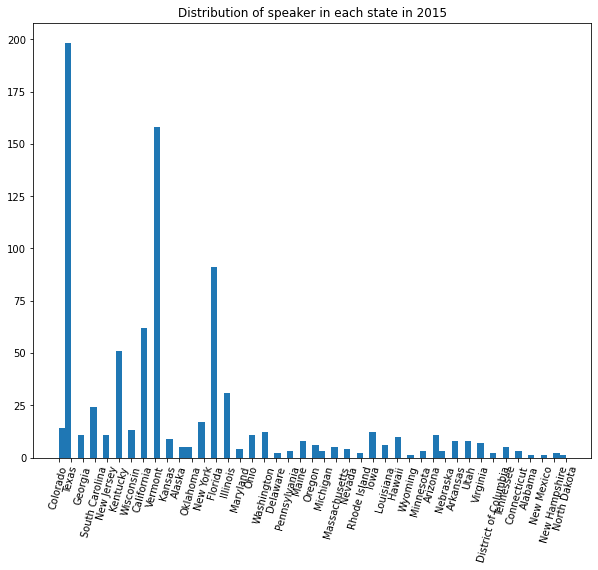

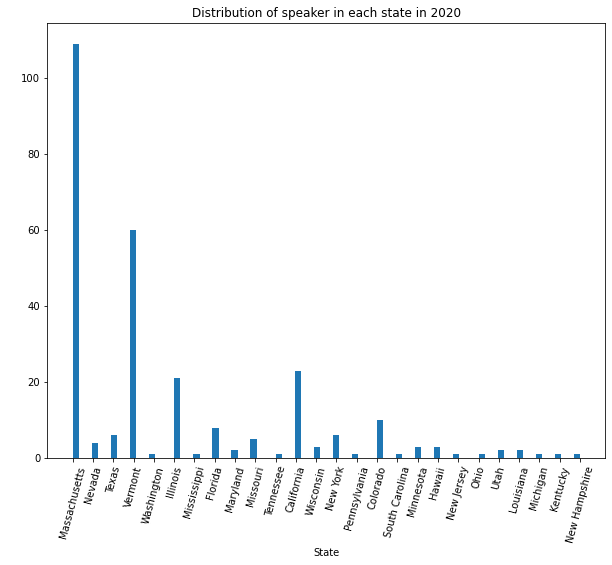

In [21]:
##WE NEED A KIND OF NORMALIZATION CAUSE WE COMPARE DATA THAT ARE NOT FROM THE SAME SIZE --> WE HAVE A LOT MORE OF
##DATA IN ONE OF THE MERGED THAN THE OTHER
plt.figure(figsize=(10,8))
plt.hist(merged['state'].values, bins = 80)
plt.title("Distribution of speaker in each state in 2015")
plt.xticks(rotation=75)
plt.figure(figsize=(10,8))
plt.hist(merged20['state'].values, bins = 80)
plt.title("Distribution of speaker in each state in 2020")
plt.xticks(rotation=75)
plt.xlabel("State")
plt.ylabel(" ")
plt.show()

For year 2015, Texas, Vermont and Florida are the most represented states in our data.
For 2020, these are Massachysetts and Vermont.

**Now, we want to see the distribution of hatecrime due to sexual orientation in each state. We focus, for the moment, on data from 2015**

In [22]:
#Let's upload our data on hatecrime:
#We only keep data relevant for our subject, that is sexual orientation and gender identity
hc2015=pd.read_csv('data/hatecrime2015.csv')
hc2015.sort_index()
hc2015=hc2015.drop(columns=['Agency Type', 'Race/\nEthnicity/\nAncestry', 'Religion','Disability','Gender', '1st\nquarter'
                    , '2nd\nquarter','3rd\nquarter', '4th\nquarter', 'Agency name' ])

In [23]:
#remove unrelevant line spotted in the file
for i in range(hc2015.shape[0]):
    if (hc2015.State.loc[i]=='3 Includes one incident reported with more than one bias motivation.'):
        hc2015.State.loc[i]='NaN'

In [24]:
#The state value is filled once and then only NaN value for all the following rows until new state, therefore we fill in
# the NaN value with the relevant State 
hc=hc2015.fillna(method='ffill', axis=0)
hc=hc.rename(columns = {'Sexual\norientation': 'sexual_orientation', 'Gender\nIdentity': 'gender_identity'})

In [25]:
#last lines are non valid with respect to our study, therefore we drop them
hc=hc.drop(labels=[1980,1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], axis=0)

In [26]:
nb_hc=hc.groupby(['State']).sum()

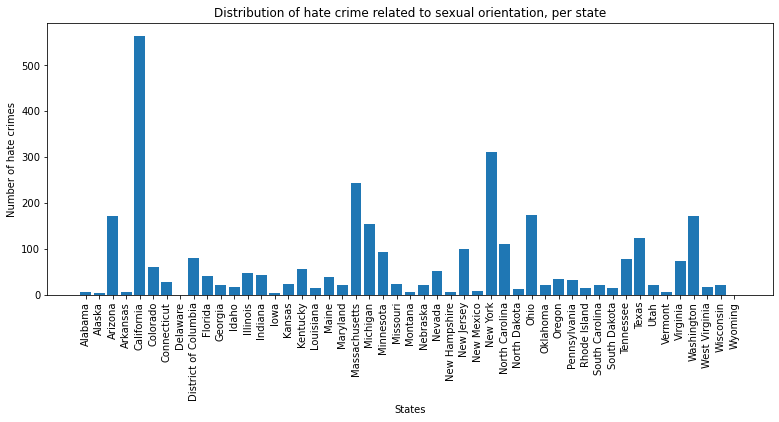

In [27]:
#let's plot the distribution of hate crime related to sexual orientation, per state
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.sexual_orientation)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of hate crime related to sexual orientation, per state')
plt.xticks(rotation = 90)
plt.show()

We can see that California has the highest number of hate crime related to sexual orientation. It is interesting to point it out as we have seen in the previous plot that California has lots of speakers on the matter of gay rights. 

Indeed, after looking up on Internet, hate crimes with a sexual orientation bias are the second most common type of hate crime over 2006-2015 in California.

Let's check if we have a bias due to a high number of speakers in California or to a politician well known for its implication in the LGBT topic:

In [28]:
#is there a bias? let's have a look at the number of occurrences for speakers in California:
california=merged[merged['state']=='California']
california_speaker=california.speaker.tolist()
#keep only one of each duplicates
california_speaker=list(set(california_speaker))
speaker_california=per_speaker.loc[california_speaker]
speaker_california

,numOccurrences
speaker,
Lois Capps,9
Duncan Hunter,15
Doug LaMalfa,1
Ami Bera,1
Loretta Sanchez,1
Nancy Pelosi,30
Mark Takano,1
Karen Bass,2
Dianne Feinstein,3


In [29]:
x=975/speaker_california.numOccurrences.max()
print("The maximum number of occurrences per speaker was attributed to Bernie Sanders: 975",
     "\nThe highest value from the list above is smaller by a factor: {}.".format(x), 
      "Thus we conclude there is no bias for California.")


The maximum number of occurrences per speaker was attributed to Bernie Sanders: 975 
The highest value from the list above is smaller by a factor: 32.5. Thus we conclude there is no bias for California.


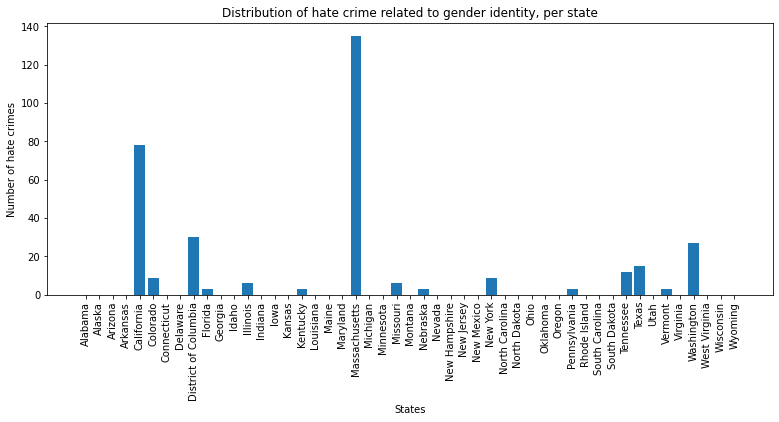

In [30]:
#same plot but for gender identity
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.gender_identity)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of hate crime related to gender identity, per state')
plt.xticks(rotation = 90)
plt.show()

We can see that gender identity related hate crime are not present in lots of state. It is probably because in 2015, we were talking less about gender identity than nowadays. Therefore, probably less people reported it as gender identity hate crime.
Nevertheless, we can see that in Massachussetts and California, there have been important number of **reported** agressions with respect to the other states. For Massachussetts, there are approximately the same number of hate crime due to gender identity and to sexual orientation, therefore the whole lgbtqa+ community is very much targeted. 

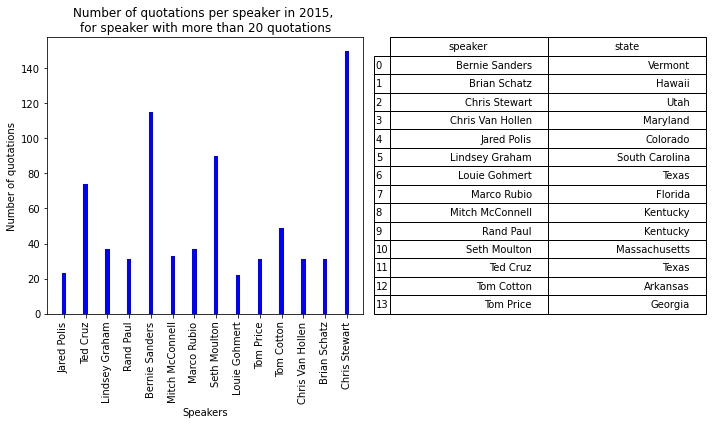

In [39]:
#As we have a majority of speakers with very few quotations, and a minority with many quotations, 
#we set a threshold for the visualization to get rid of the high number of speakers with a few quotations only
merged_quot= merged[merged['numOccurrences']>20]
speaker_quot=((merged[merged['numOccurrences']>20]).groupby("speaker")['numOccurrences'].sum()).index.tolist()
speaker_quot=pd.DataFrame({'speaker': speaker_quot})
speaker_quot.sample(5)

#Display the states corresponding to these speakers, to understand if there are bias:
speaker_state=pd.merge(speaker_quot, politicians, left_on='speaker', right_on='speaker', how='inner')

#visualization of the number of quotations per speaker, with a minimum of 20 quotations:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(122)
font_size = 14
bbox = [0, 0, 1, 1]
ax1.axis('off')
mpl_table = ax1.table(cellText=speaker_state.values, rowLabels=speaker_state.index, bbox=bbox, colLabels=speaker_state.columns)

ax2 = fig.add_subplot(121)
ax2.bar(merged_quot.speaker, merged_quot.numOccurrences, color='blue', width=0.2)
ax2.set_xlabel('Speakers')
ax2.set_ylabel('Number of quotations')
ax2.set_title('Number of quotations per speaker in 2015, \nfor speaker with more than 20 quotations')
plt.xticks(rotation=90)
plt.show()

**Bernie Sanders** and **Chris Stewart** are talking a lot about lgbtq+ topics. As we can see in the table, they are the speakers for Vermont and Utah. We also saw previously that Vermont has high number of quotations, so it could be a bias due to the presence of Bernie Sanders who is really involved in this topic.

In [40]:
#get the number of occurences of all the quotations for a state
grouped_by_state = merged.groupby('state').agg({'numOccurrences' : sum})

#Add a column with the number of different quotations for a state
grouped_by_state['numQuotations']= merged.state.value_counts()
grouped_by_state.sort_values(by = 'numOccurrences', ascending=False)


,numOccurrences,numQuotations
state,,
Vermont,980,158
Texas,625,198
Florida,312,91
Kentucky,258,51
Utah,165,8
California,104,62
Massachusetts,95,5
Arkansas,95,8
South Carolina,92,24


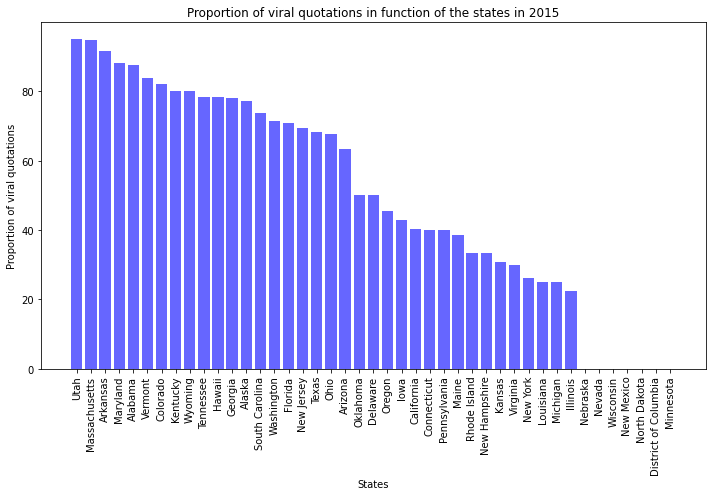

In [42]:
grouped_by_state['proportional_numQuotations'] = (grouped_by_state.numQuotations/grouped_by_state.numOccurrences)*100
grouped_by_state=grouped_by_state.sort_values(by= 'proportional_numQuotations', ascending=True)
plt.figure(figsize=(10,7))
plt.bar(grouped_by_state.index, 100-grouped_by_state.proportional_numQuotations, color='blue', alpha=0.6 )
plt.xlabel('States')
plt.ylabel('Proportion of viral quotations')
plt.xticks(rotation=90)
plt.title("Proportion of viral quotations in function of the states in 2015")
plt.show()

This graph presents the proportion of viral quotations for each state.
In fact, we compute the percentage of the number of different quotations over the total number of occurences of quotations for each state and displays 100 minus this proportion to get the proportion of viral quotations. 

If there is a low number of quotations in a specific state and the total number of occurences is very high, this means that these quotations were widely quoted by other speakers or in media supports such as articles and that we talked a lot about it. We assume that if we discuss and mention many times a quotation, it went **viral** and may be polemical.

For example, in Utah,the number of different quotations is very low. This means there is a high number of occurences for just a few different quotations. We see in the previous table that it is on a significant number of occurences. Concretely, it means it is probably a polemical sentence.

In [44]:
#file lgbt population:
lgbtpopulation=pd.read_csv("data/lgbtpopulation2021.csv")

#pre-processing steps:
lgbtpopulation=lgbtpopulation.dropna(how='any', axis=0)
lgbtpopulation.groupby("STATE").sum() #in case there are duplicates of states across rows
lgbtpopulation.sample(10)

,STATE,TOTAL ADULT POPULATION,LGBT ADULT POPULATION,LGBT POPULATION DENSITY,% OF LGBTQ INDIVIDUALS RAISING CHILDREN,% OF SAME-SEX COUPLES RAISING CHILDREN
19,KENTUCKY,"4,468,402","144,000",3.400%,26.00%,18.500%
49,UTAH,"3,161,108","104,000",3.700%,40.0%,20.100%
14,IDAHO,"1,754,208","48,000",2.800%,44.00%,22.300%
5,CALIFORNIA,"39,557,045","1,859,000",5.300%,24.00%,16.00%
41,PENNSYLVANIA,"12,807,060","490,000",4.100%,27.00%,15.900%
8,DELAWARE,"967,171","40,000",4.500%,35.00%,15.600%
21,MAINE,"1,338,404","60,000",4.900%,21.00%,13.800%
6,COLORADO,"5,695,564","234,000",4.600%,25.00%,15.900%
15,ILLINOIS,"12,741,080","506,000",4.300%,28.00%,16.600%
27,MISSOURI,"6,126,452","217,000",3.800%,26.00%,17.300%


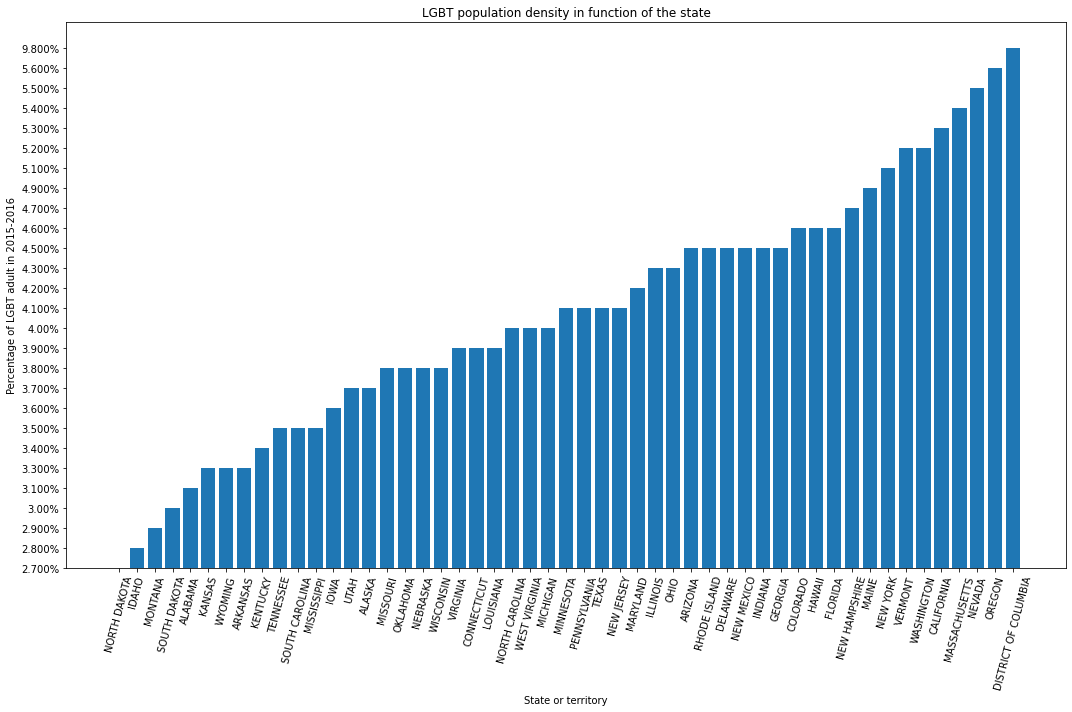

In [45]:
lgbtpopulation=lgbtpopulation.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)
plt.figure(figsize=(15,10))
plt.bar(lgbtpopulation['STATE'],lgbtpopulation['LGBT POPULATION DENSITY'])
plt.title("LGBT population density in function of the state")
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.show()

We can see that North Dakota is the state with the smallest percentage of reported LGBT adults for the years 2015-2016, while in Oregon or in the District of Colombia the density is way higher. Note that these data are probably obtained from surveys, therefore it does not necessary correspond to the reality because some people may not have tell the truth nor filled in the form. 
In the previous analysis we didn't notice anything particular (like very high number of quotations) about North Dakota, Oregon and District of Columbia.  

In [46]:
#let's look at the states where the normalization showed that there are a lot of lgbt topic related quotations:
quoted_a_lot=['TEXAS', 'VERMONT', 'FLORIDA', 'CALIFORNIA']

#let's look at the states that are low or high in nber of lgbt people:
extremes_lgbt_pop=['NORTH DAKOTA', 'OREGON', 'DISTRICT OF COLOMBIA']

df=lgbtpopulation.loc[lgbtpopulation['STATE'].isin(quoted_a_lot+extremes_lgbt_pop)].drop(columns=['LGBT ADULT POPULATION','TOTAL ADULT POPULATION','% OF LGBTQ INDIVIDUALS RAISING CHILDREN', '% OF SAME-SEX COUPLES RAISING CHILDREN'])
df

,STATE,LGBT POPULATION DENSITY
36,NORTH DAKOTA,2.700%
47,TEXAS,4.100%
10,FLORIDA,4.600%
50,VERMONT,5.200%
5,CALIFORNIA,5.300%
40,OREGON,5.600%


In [47]:

#######METTRE UNE COULEUR PAR BAR QUI SONT DANS QUOTED A LOT ET UNE AUTRE COULEUR POUR LES STATE DANS EXTREME_LGBT_POP


df=df.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)

clrs = ['grey' if (x in quoted_a_lot) else 'green' for x in df['STATE'] ]
plt.figure(figsize=(10,5))
sns.barplot(x=df.STATE, y=df['LGBT POPULATION DENSITY'], palette=clrs)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x360 with 0 Axes>

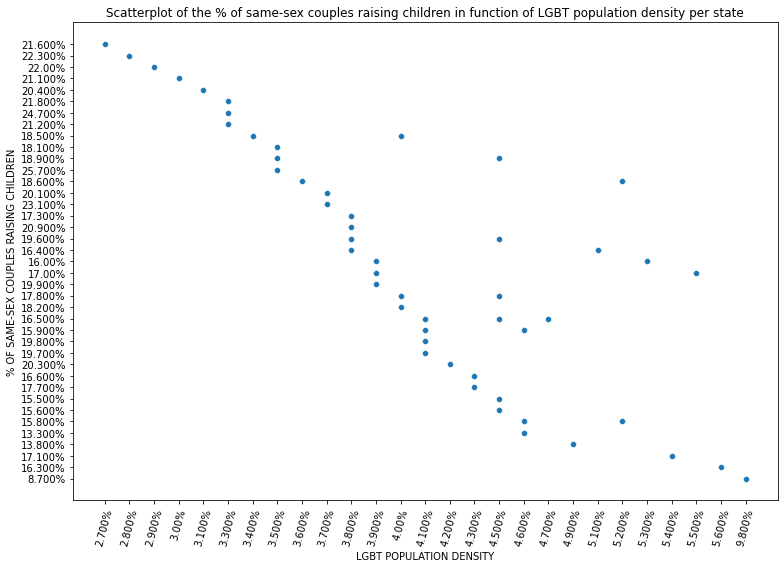

In [48]:
#Correlation between LGBT population density and percentage of same-sex couples raising children
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
plt.xticks(rotation=75)
sns.scatterplot(data=lgbtpopulation, x='LGBT POPULATION DENSITY', y='% OF SAME-SEX COUPLES RAISING CHILDREN', ax=ax).set(title="Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state") 
plt.show()

We will discuss it later, here we are just doing some pre-processing steps and visualizations but it seems that we have a negative correlation between these two categories.

In [49]:
#file lgbtsummary
lgbtsummary=pd.read_csv("data/lgbtsummary.csv")
lgbtsummary=lgbtsummary[:-1] #remove last row to sort by increasing population rank
lgbtsummary=lgbtsummary[['Pop.rank', 'State or territory', '2015–2016 LGBTadult percentageestimate[7]', 
                         '2016 transgender adult percentage estimate[2]']]
lgbtsummary=lgbtsummary.rename(columns={"2015–2016 LGBTadult percentageestimate[7]": 
                                        "Percentage of LGBT adult in 2015-2016", 
                                        "2016 transgender adult percentage estimate[2]": 
                                        "Percentage of transgender adult in 2016"})
lgbtsummary.head(lgbtsummary.shape[0]) #just to check that it is well ordered throughout the dataframe


,Pop.rank,State or territory,Percentage of LGBT adult in 2015-2016,Percentage of transgender adult in 2016
0,1,California,4.8%,0.76%
1,2,Texas,3.6%,0.66%
2,3,New York,4.5%,0.51%
3,4,Florida,4.2%,0.66%
4,5,Illinois,3.7%,0.51%
5,6,Ohio,3.8%,0.45%
6,7,Michigan,3.8%,0.43%
7,8,Georgia,4.0%,0.75%
8,9,Pennsylvania,3.6%,0.44%
9,10,New Jersey,3.6%,0.44%


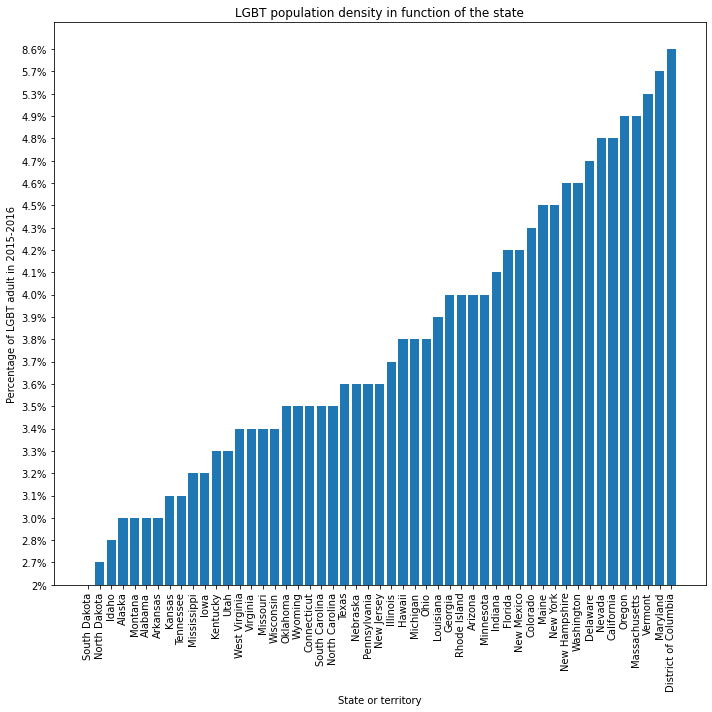

In [50]:
lgbtsummary=lgbtsummary.sort_values(by='Percentage of LGBT adult in 2015-2016', axis=0)
plt.figure(figsize=(10,10))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of LGBT adult in 2015-2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.title("LGBT population density in function of the state")
plt.show()

It shows similar results as in lgbtpopulation: our data seem to be trustable.

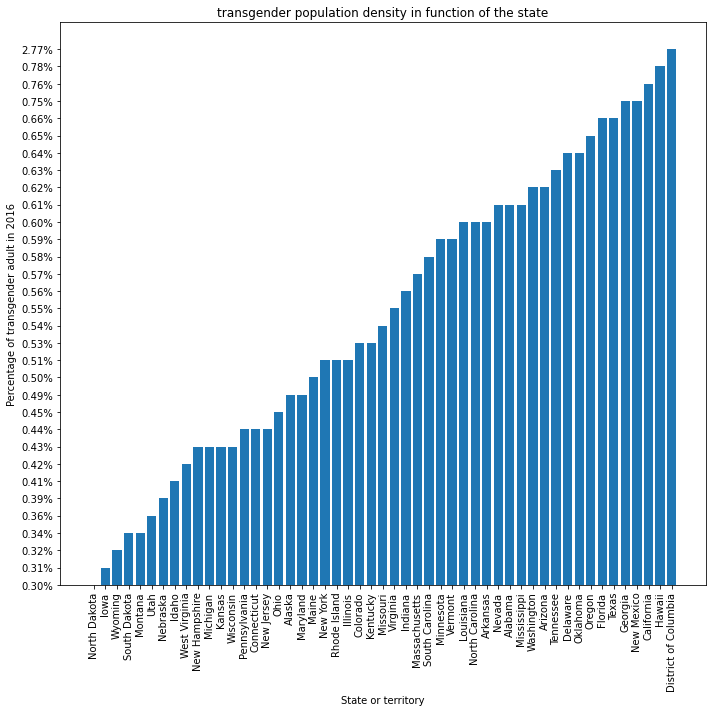

In [51]:
lgbtsummary=lgbtsummary.sort_values(by='Percentage of transgender adult in 2016', axis=0)
plt.figure(figsize=(10,10))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of transgender adult in 2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of transgender adult in 2016")
plt.title("transgender population density in function of the state")
plt.show()

Same as for the lgbt population: the states with the highest and smallest density are respectively District of Columbia and North Dakota.